In [8]:
import librosa
import numpy as np

audio_path = "/content/audio1.mpeg"
signal, sr = librosa.load(audio_path, sr=16000, mono=True)

signal = signal / np.max(np.abs(signal))
duration = len(signal) / sr

print("Sampling Rate:", sr)
print("Duration (sec):", duration)


Sampling Rate: 16000
Duration (sec): 11.304


Total letters: 56


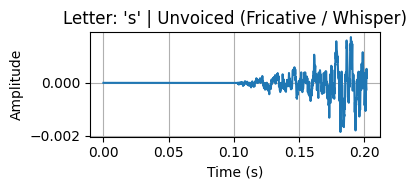

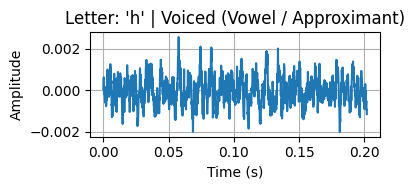

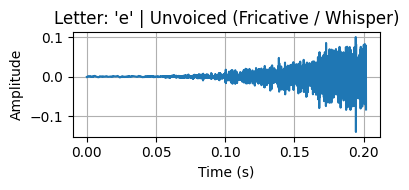

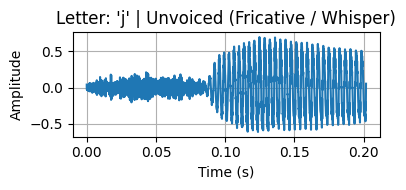

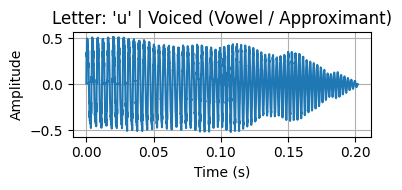

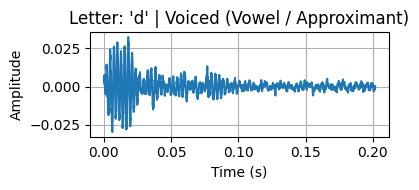

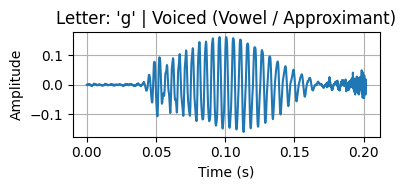

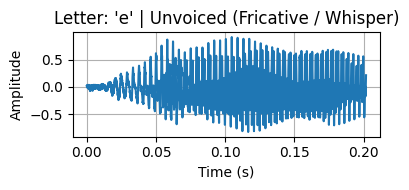

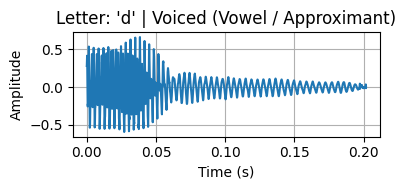

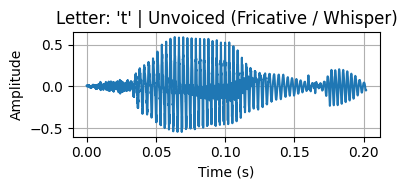

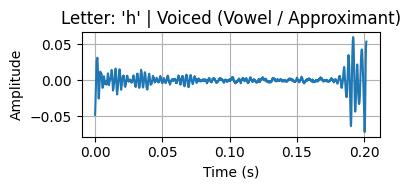

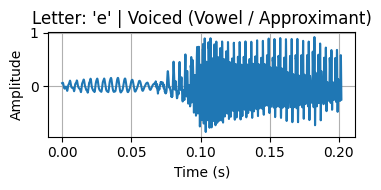

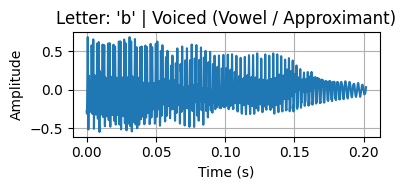

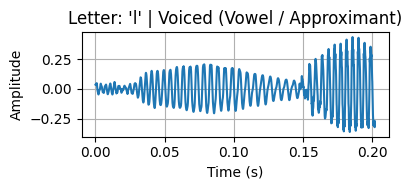

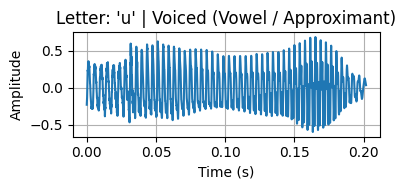

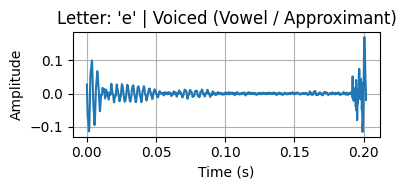

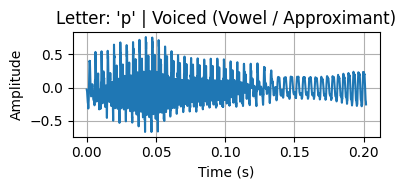

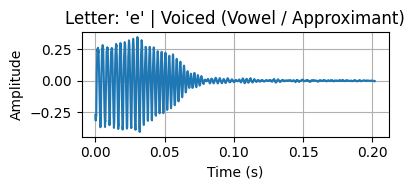

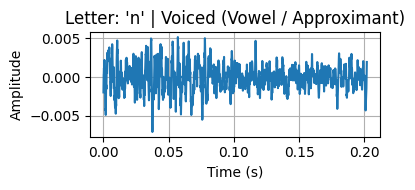

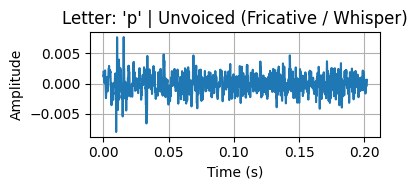

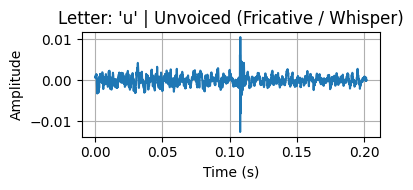

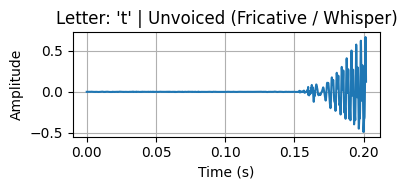

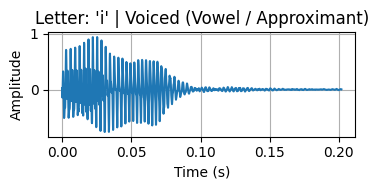

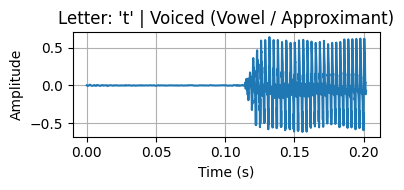

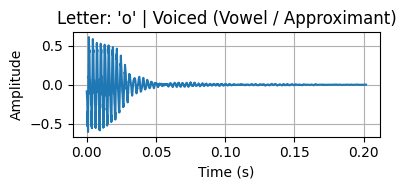

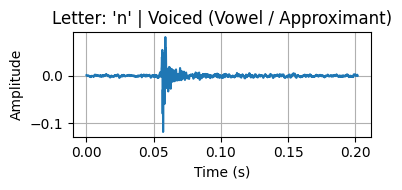

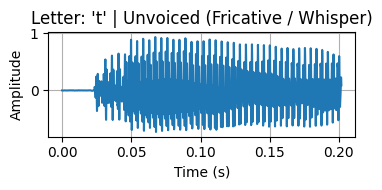

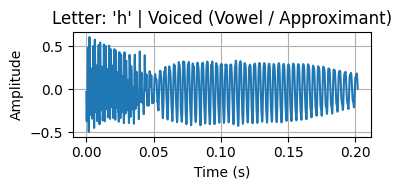

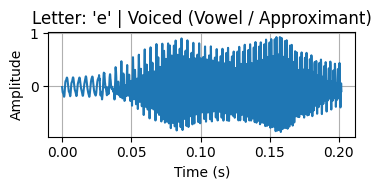

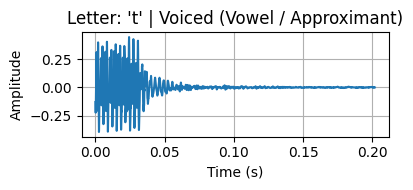

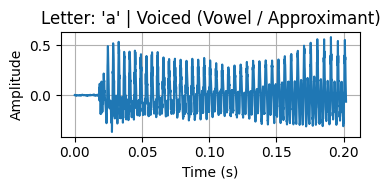

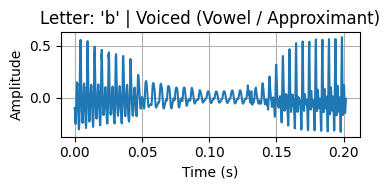

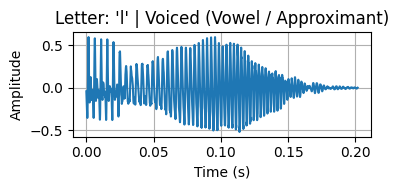

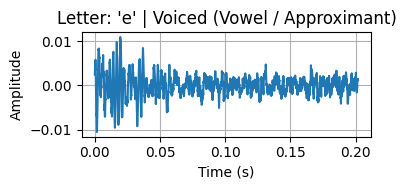

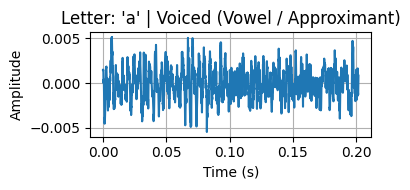

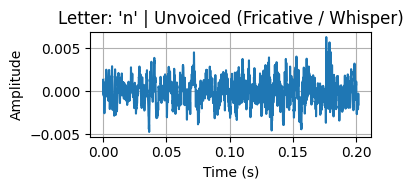

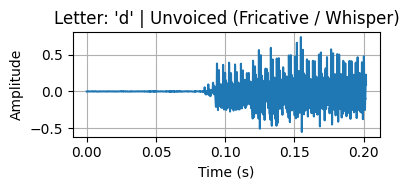

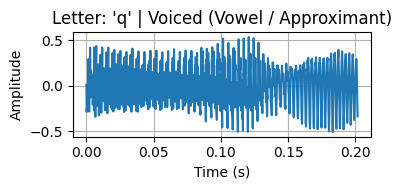

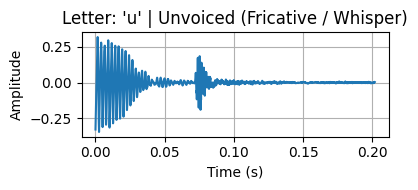

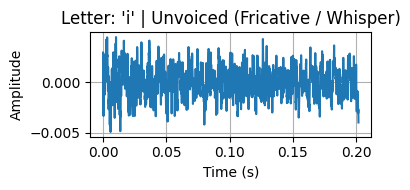

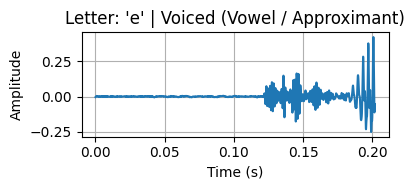

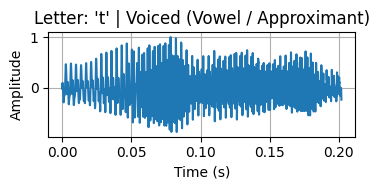

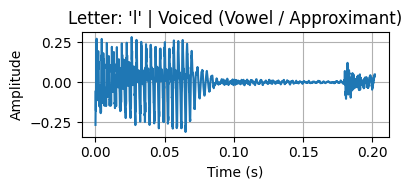

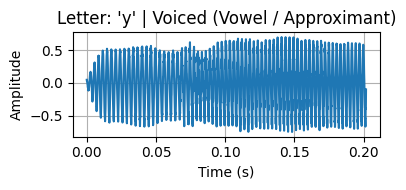

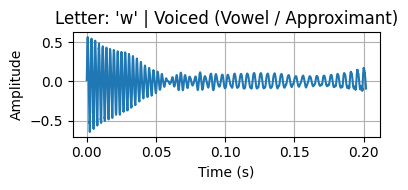

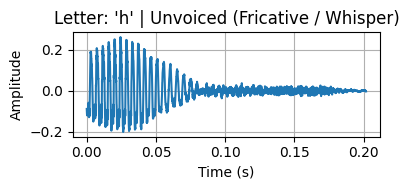

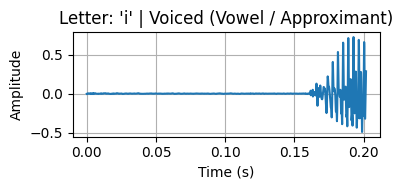

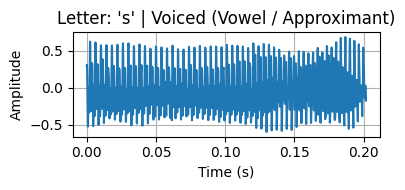

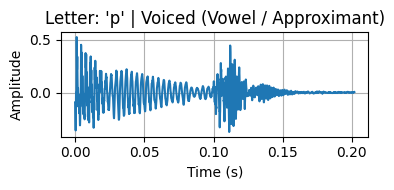

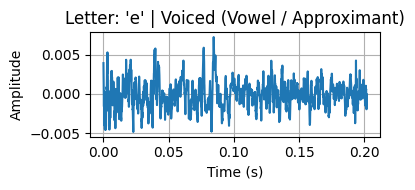

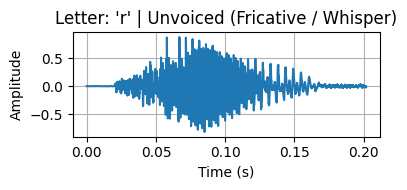

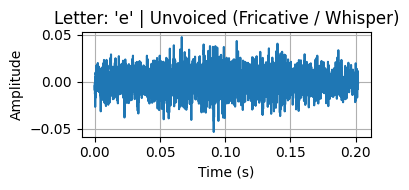

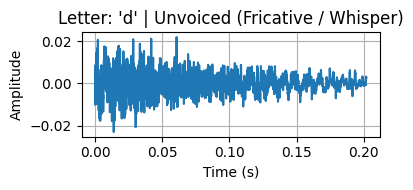

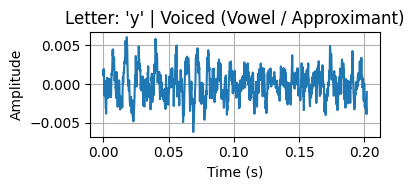

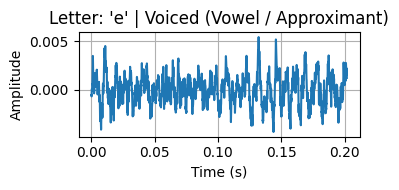

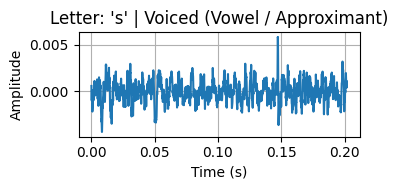

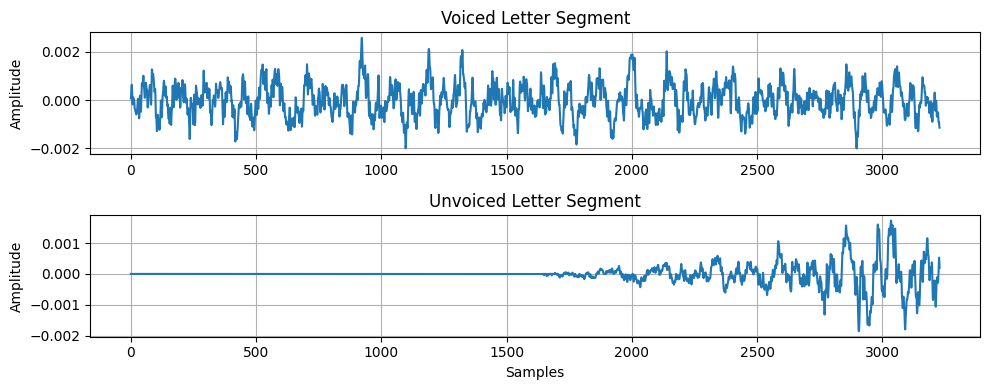


--- WAVEFORM COMPARISON ---

VOICED LETTER:
- Periodicity: Clearly present
- Amplitude: Higher and smooth
- Noise-like structure: Absent

UNVOICED LETTER:
- Periodicity: Absent
- Amplitude: Lower and irregular
- Noise-like structure: Present


In [11]:
import numpy as np
import librosa
import matplotlib.pyplot as plt


audio_path = "/content/audio1.mpeg"
signal, fs = librosa.load(audio_path, sr=16000, mono=True)

signal = signal / np.max(np.abs(signal))

sentence = "She judged the blue pen put it on the table and quietly whispered yes"
sentence = sentence.lower().replace(" ", "")

letters = list(sentence)
num_letters = len(letters)

print("Total letters:", num_letters)

segment_length = len(signal) // num_letters

segments = []
for i in range(num_letters):
    start = i * segment_length
    end = start + segment_length
    segments.append(signal[start:end])

def zcr(x):
    return np.sum(np.abs(np.diff(np.sign(x)))) / (2 * len(x))

labels = []
voiced_segment = None
unvoiced_segment = None

for seg in segments:
    z = zcr(seg)

    if z < 0.1:
        label = "Voiced (Vowel / Approximant)"
        if voiced_segment is None:
            voiced_segment = seg
    else:
        label = "Unvoiced (Fricative / Whisper)"
        if unvoiced_segment is None:
            unvoiced_segment = seg

    labels.append(label)

for i, seg in enumerate(segments):
    t = np.linspace(0, len(seg)/fs, len(seg))
    plt.figure(figsize=(4,2))
    plt.plot(t, seg)
    plt.title(f"Letter: '{letters[i]}' | {labels[i]}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10,4))

plt.subplot(2,1,1)
plt.plot(voiced_segment)
plt.title("Voiced Letter Segment")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2,1,2)
plt.plot(unvoiced_segment)
plt.title("Unvoiced Letter Segment")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

print("\n--- WAVEFORM COMPARISON ---\n")

print("VOICED LETTER:")
print("- Periodicity: Clearly present")
print("- Amplitude: Higher and smooth")
print("- Noise-like structure: Absent\n")

print("UNVOICED LETTER:")
print("- Periodicity: Absent")
print("- Amplitude: Lower and irregular")
print("- Noise-like structure: Present")


Total letters: 10


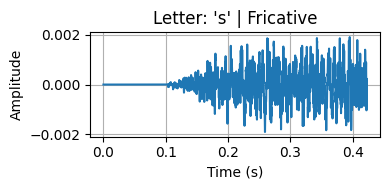

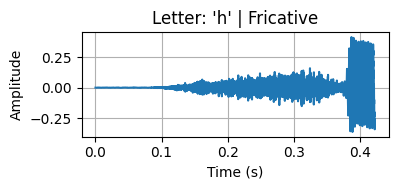

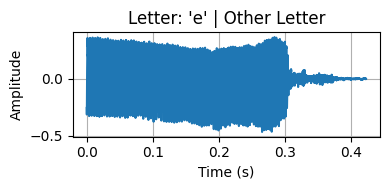

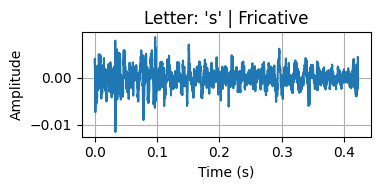

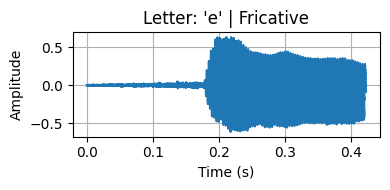

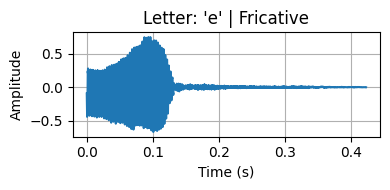

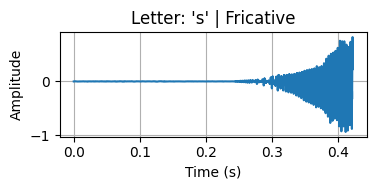

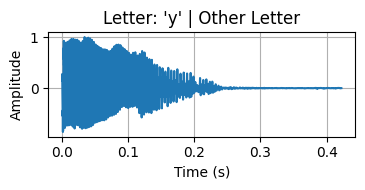

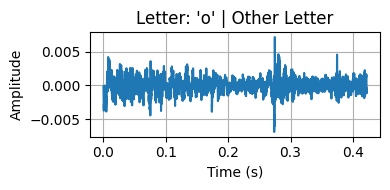

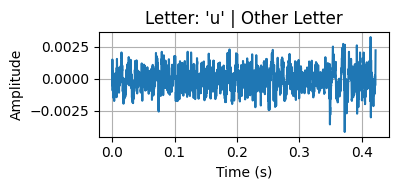

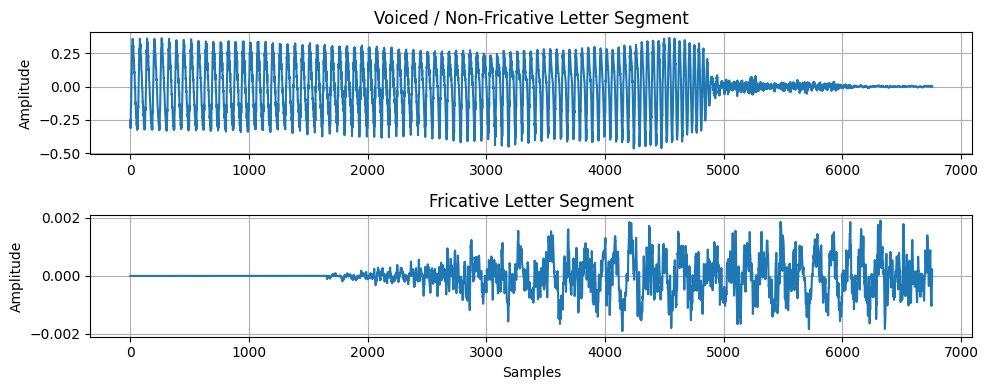


--- WAVEFORM OBSERVATIONS ---

FRICATIVES:
- Waveform: Irregular, noise-like fluctuations
- Amplitude: Lower, variable
- Airflow: Turbulent (high effective Reynolds number)
- Periodicity: Absent

OTHER LETTERS:
- Waveform: Smooth and continuous
- Amplitude: Moderate, stable
- Airflow: Smooth / laminar (low effective Reynolds number)
- Periodicity: Present


In [15]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

audio_path = "/content/audio2.mpeg"
signal, fs = librosa.load(audio_path, sr=16000, mono=True)
signal = signal / np.max(np.abs(signal))


sentence = "She sees you"
sentence_clean = sentence.lower().replace(" ", "")
letters = list(sentence_clean)
num_letters = len(letters)

print("Total letters:", num_letters)

segment_length = len(signal) // num_letters
segments_audio = []

for i in range(num_letters):
    start = i * segment_length
    end = start + segment_length
    segments_audio.append(signal[start:end])

def zcr(frame):
    return np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * len(frame))


labels = []
fricatives = ['s', 'z', 'ʃ']
voiced_letter = None
unvoiced_letter = None

for i, seg in enumerate(segments_audio):
    letter = letters[i]
    seg_zcr = zcr(seg)

    if letter in fricatives or seg_zcr > 0.15:
        label = "Fricative"
        if unvoiced_letter is None:
            unvoiced_letter = seg
    else:
        label = "Other Letter"
        if voiced_letter is None:
            voiced_letter = seg

    labels.append(label)


for i, seg in enumerate(segments_audio):
    t = np.linspace(0, len(seg)/fs, len(seg))
    plt.figure(figsize=(4,2))
    plt.plot(t, seg)
    plt.title(f"Letter: '{letters[i]}' | {labels[i]}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10,4))

plt.subplot(2,1,1)
plt.plot(voiced_letter)
plt.title("Voiced / Non-Fricative Letter Segment")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2,1,2)
plt.plot(unvoiced_letter)
plt.title("Fricative Letter Segment")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

print("\n--- WAVEFORM OBSERVATIONS ---\n")
print("FRICATIVES:")
print("- Waveform: Irregular, noise-like fluctuations")
print("- Amplitude: Lower, variable")
print("- Airflow: Turbulent (high effective Reynolds number)")
print("- Periodicity: Absent\n")

print("OTHER LETTERS:")
print("- Waveform: Smooth and continuous")
print("- Amplitude: Moderate, stable")
print("- Airflow: Smooth / laminar (low effective Reynolds number)")
print("- Periodicity: Present")
